In [118]:
import pandas as pd
import seaborn as sns
import squarify as sq
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
def display_tree(df):
    sizes=df.values
    label=df.index
    sq.plot(sizes=sizes, label=label, value=df.values, alpha=0.6 )
    plt.show()

In [108]:
def dept_tree_df(df, dept):
    df = df.to_frame().reset_index().rename(columns= {0: 'Sum'})
    df['Parent'] = dept
    return df

In [4]:
oakland = pd.read_csv('../data/processed/oak_aggregation.csv')

In [5]:
oakland.head()

,Department Alias,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total,Agencies by Category
0,Capital Improvement Projects,66201524.0,102439500.0,92860926.0,"Public Works, Transportation, and Commerce"
1,City Administrator,18912172.0,23722653.0,25178890.0,General Administration & Finance
2,City Attorney,18615221.0,20216139.0,21696825.0,General Administration & Finance
3,City Auditor,2064905.0,2309876.0,2426363.0,General Administration & Finance
4,City Clerk,7259799.0,7523024.0,7386812.0,General Administration & Finance


In [49]:
oakland.groupby(['Agencies by Category']).sum()

,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total
Agencies by Category,,,
Culture & Recreation,1.090949e+08,1.200622e+08,1.279472e+08
General Administration & Finance,9.778795e+08,1.080197e+09,1.114219e+09
Human Welfare & Neighborhood Development,2.548599e+08,3.209873e+08,2.886949e+08
Public Protection,4.747248e+08,5.317411e+08,5.492250e+08
"Public Works, Transportation, and Commerce",1.151739e+09,1.259457e+09,1.224018e+09


In [86]:
org_sums = oakland.groupby(['Agencies by Category']).sum().sum(axis=1)
org_sums

Agencies by Category
Culture & Recreation                          3.571042e+08
General Administration & Finance              3.172296e+09
Human Welfare & Neighborhood Development      8.645422e+08
Public Protection                             1.555691e+09
Public Works, Transportation, and Commerce    3.635214e+09
dtype: float64

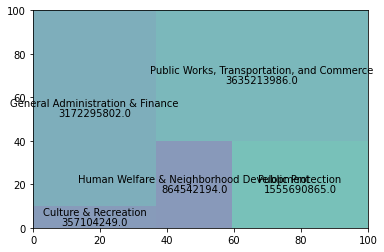

In [63]:
display_tree(org_sums)

In [53]:
# Per Department
culture_rec = oakland[oakland['Agencies by Category'] == 'Culture & Recreation'].groupby(['Department Alias']).sum().sum(axis=1)
gen_admin = oakland[oakland['Agencies by Category'] == 'General Administration & Finance'].groupby(['Department Alias']).sum().sum(axis=1)
hum_welfare = oakland[oakland['Agencies by Category'] == 'Human Welfare & Neighborhood Development'].groupby(['Department Alias']).sum().sum(axis=1)
pub_protection = oakland[oakland['Agencies by Category'] == 'Public Protection'].groupby(['Department Alias']).sum().sum(axis=1)
pub_works = oakland[oakland['Agencies by Category'] == 'Public Works, Transportation, and Commerce'].groupby(['Department Alias']).sum().sum(axis=1)

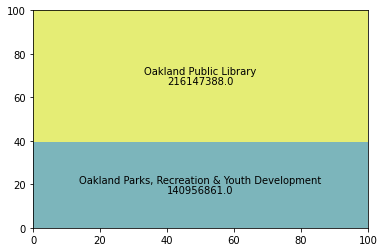

In [64]:
display_tree(culture_rec)

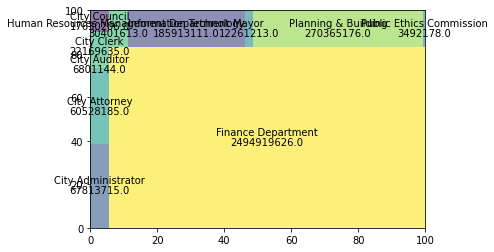

In [65]:
display_tree(gen_admin)

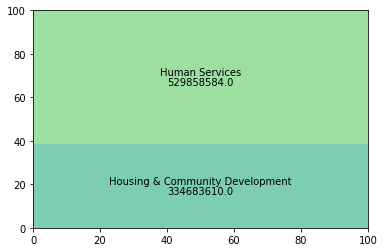

In [66]:
display_tree(hum_welfare)

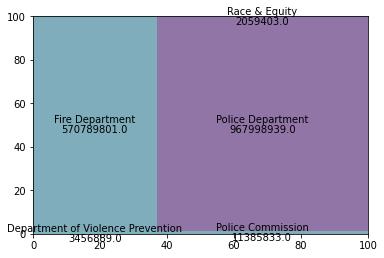

In [67]:
display_tree(pub_protection)

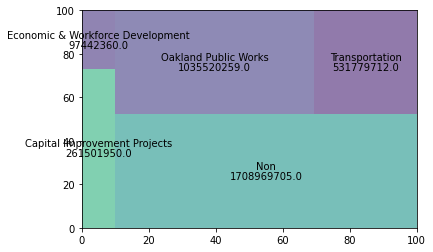

In [68]:
display_tree(pub_works)

In [93]:
org_sums.values

array([3.57104249e+08, 3.17229580e+09, 8.64542194e+08, 1.55569086e+09,
       3.63521399e+09])

In [109]:
tree_df = org_sums.to_frame().reset_index().rename(columns= {0: 'Sum'})
tree_df = df.rename(columns={'Agencies by Category': 'Department Alias'})
tree_df['Parent'] = 'Total Budget'
tree_df

,Department Alias,Sum,Parent
0,Culture & Recreation,3.571042e+08,Total Budget
1,General Administration & Finance,3.172296e+09,Total Budget
2,Human Welfare & Neighborhood Development,8.645422e+08,Total Budget
3,Public Protection,1.555691e+09,Total Budget
4,"Public Works, Transportation, and Commerce",3.635214e+09,Total Budget


In [113]:
tree_df = pd.concat([tree_df, dept_tree_df(culture_rec, 'Culture & Recreation'),
dept_tree_df(gen_admin, 'General Administration & Finance'),
dept_tree_df(hum_welfare, 'Human Welfare & Neighborhood Development'),
dept_tree_df(pub_protection, 'Public Protection'),
dept_tree_df(pub_works, 'Public Works, Transportation, and Commerce')])

In [120]:
tree_df.to_json('plot_data/oakland_tree_map.json', orient='records')